In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./pima (1).csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,y, stratify=y, test_size=0.10, random_state=34)

In [10]:
classifer = RandomForestClassifier()
classifer.fit(X_train,Y_train)

RandomForestClassifier()

In [11]:
y_pred=classifer.predict(X_test)

In [12]:
print("accuracy : ",accuracy_score(Y_test,y_pred))

accuracy :  0.8181818181818182


In [13]:
feature_imp_df=pd.DataFrame({"feature":list(X.columns),"importance":classifer.feature_importances_}).sort_values("importance",ascending=False)
feature_imp_df

,feature,importance
1,Glucose,0.261209
5,BMI,0.162872
7,Age,0.129744
6,DiabetesPedigreeFunction,0.126981
2,BloodPressure,0.093132
0,Pregnancies,0.088151
3,SkinThickness,0.070951
4,Insulin,0.066959


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
y_prec_dt=clf.predict(X_test)
print("accuracy-decision tree",accuracy_score(Y_test,y_prec_dt))

accuracy-decision tree 0.7012987012987013


[Text(0.5512162642045455, 0.9722222222222222, 'x[1] <= 1.052\ngini = 0.454\nsamples = 691\nvalue = [450, 241]'),
 Text(0.20697798295454545, 0.9166666666666666, 'x[1] <= -0.607\ngini = 0.387\nsamples = 580\nvalue = [428, 152]'),
 Text(0.08181818181818182, 0.8611111111111112, 'x[4] <= 0.61\ngini = 0.151\nsamples = 194\nvalue = [178, 16]'),
 Text(0.045454545454545456, 0.8055555555555556, 'x[3] <= 0.625\ngini = 0.121\nsamples = 185\nvalue = [173, 12]'),
 Text(0.01818181818181818, 0.75, 'x[7] <= -0.233\ngini = 0.054\nsamples = 144\nvalue = [140, 4]'),
 Text(0.00909090909090909, 0.6944444444444444, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.02727272727272727, 0.6944444444444444, 'x[6] <= 2.142\ngini = 0.184\nsamples = 39\nvalue = [35, 4]'),
 Text(0.01818181818181818, 0.6388888888888888, 'x[1] <= -0.826\ngini = 0.145\nsamples = 38\nvalue = [35, 3]'),
 Text(0.00909090909090909, 0.5833333333333334, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.02727272727272727, 0.583333333

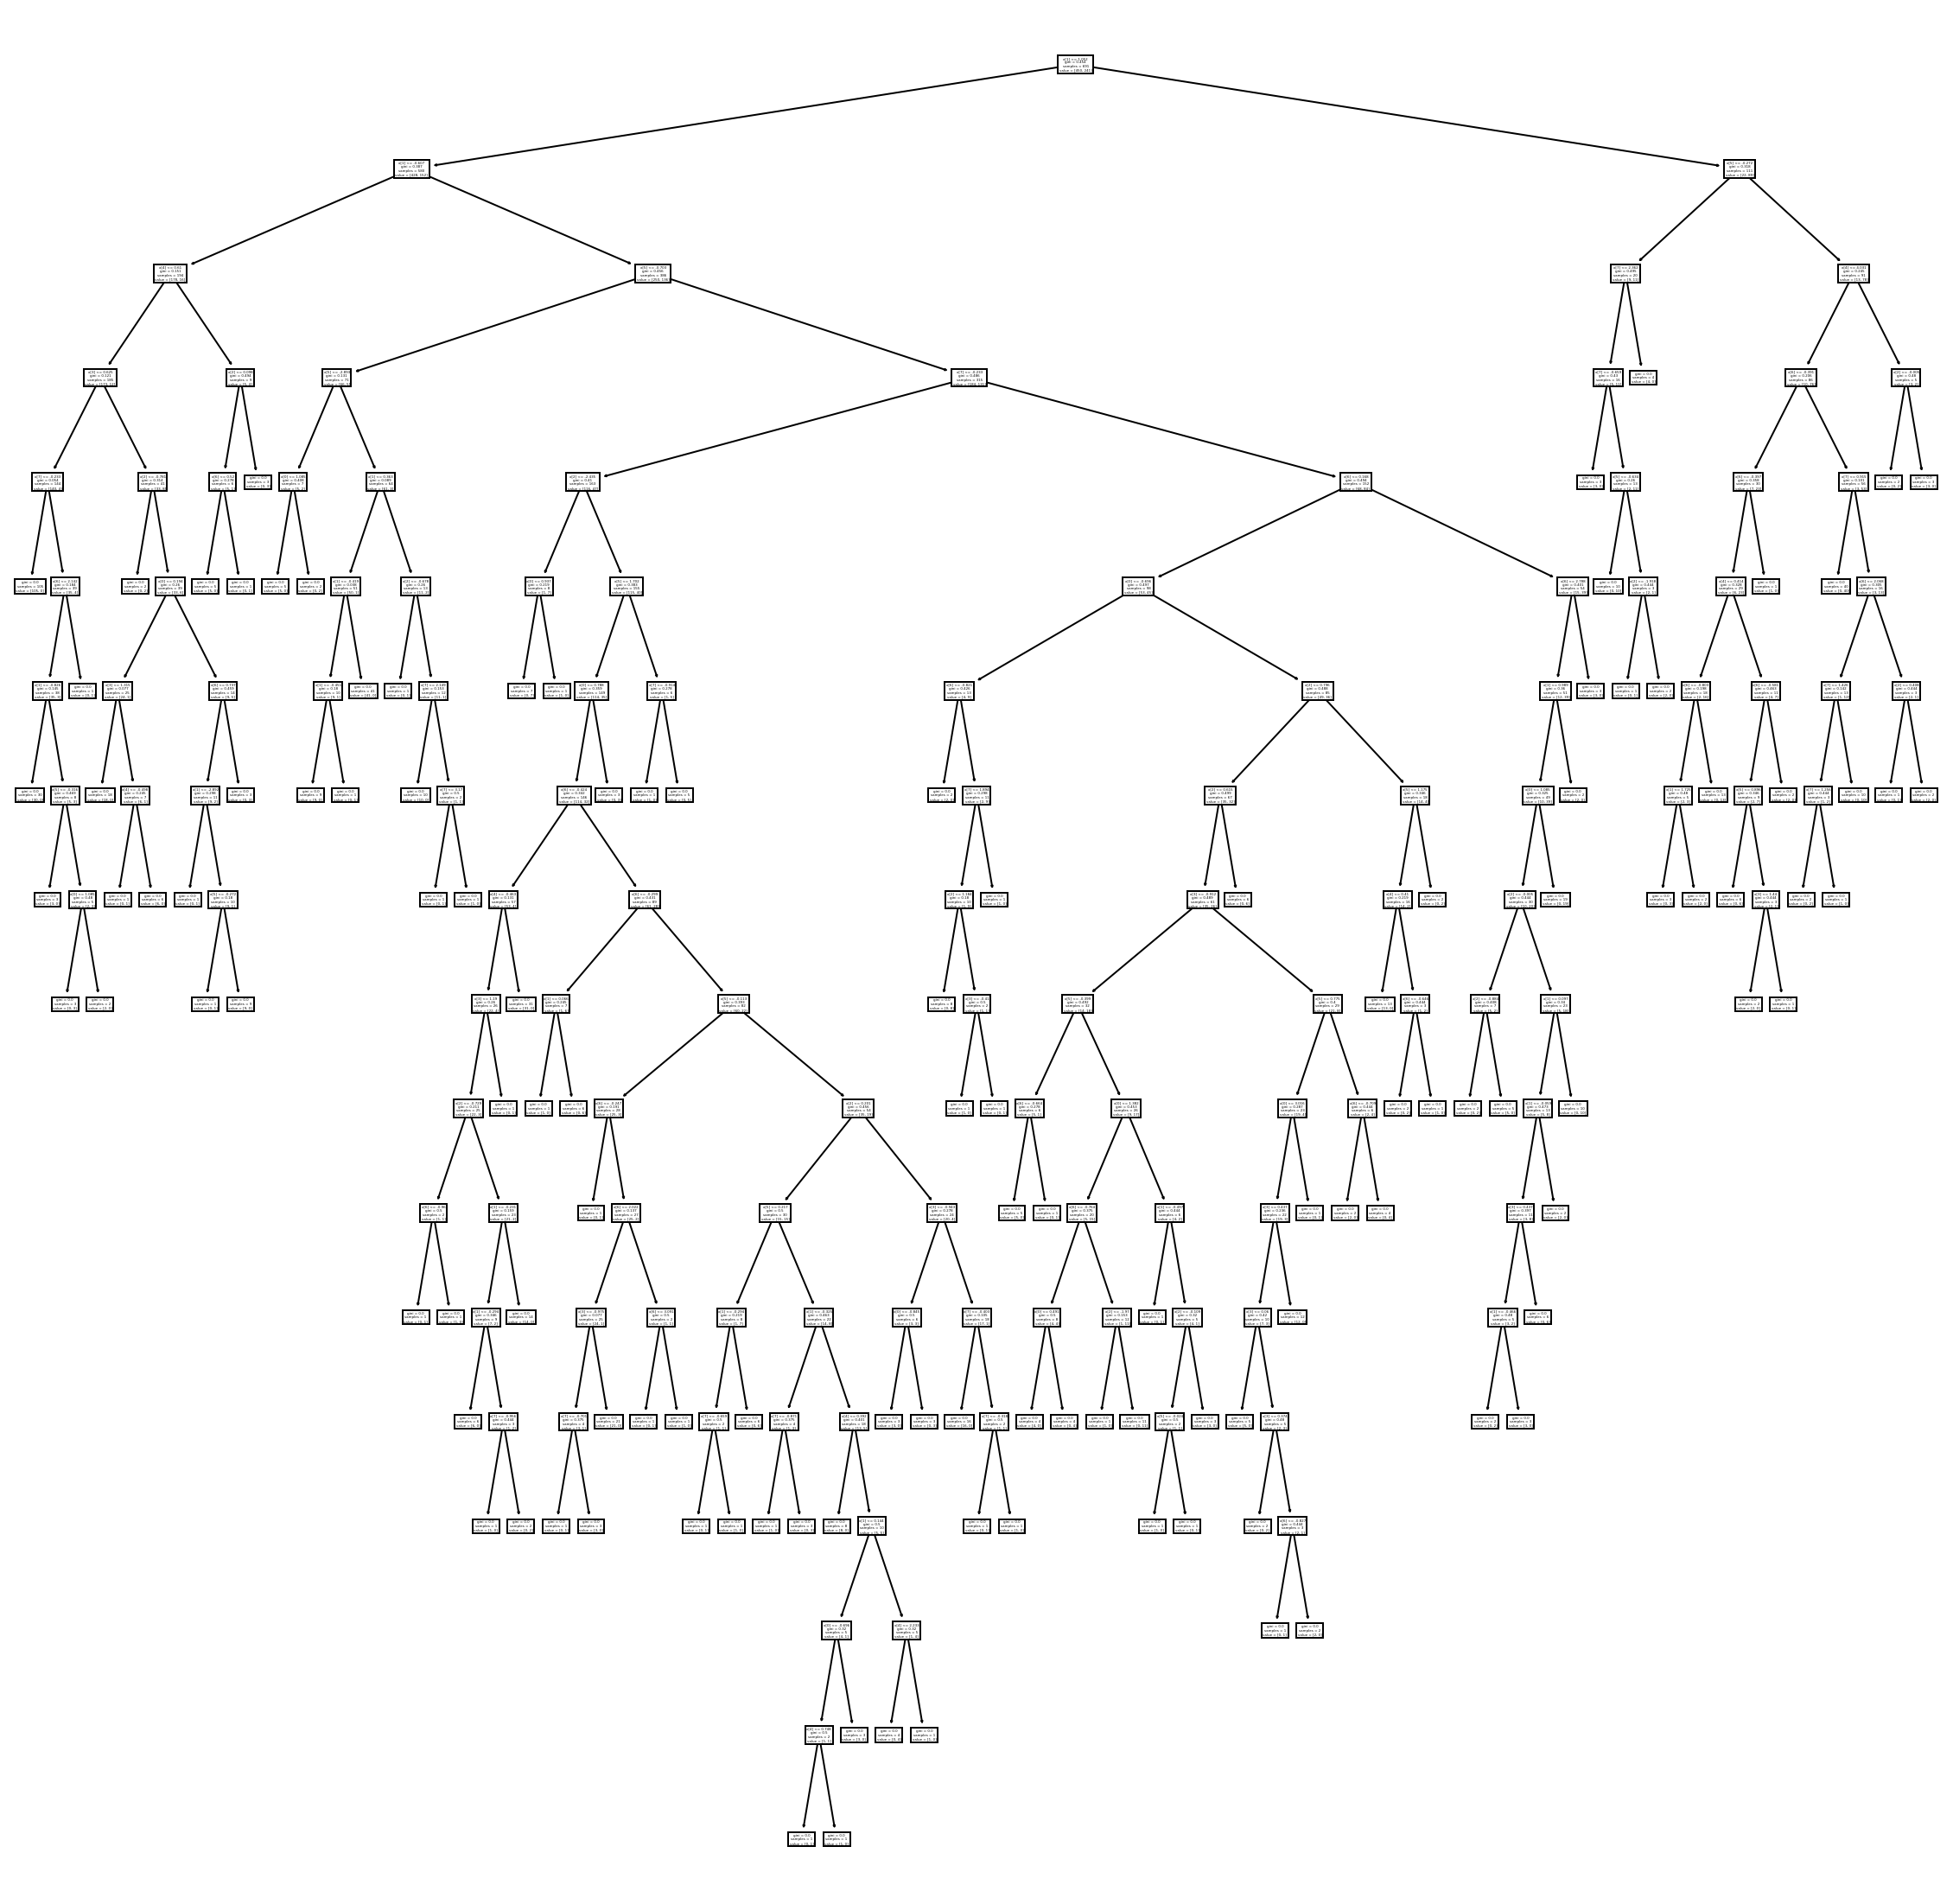

In [16]:
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf)